In [1]:
### Steps
# Create 3 folder  traing, testing and validation.
# Training( 2 folder happy and not happy)

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pylab as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [3]:
img=image.load_img(r"C:\Users\Sriya v\OneDrive\Desktop\CNN\Training\happy\IMG_20230709_225009_593.jpg")

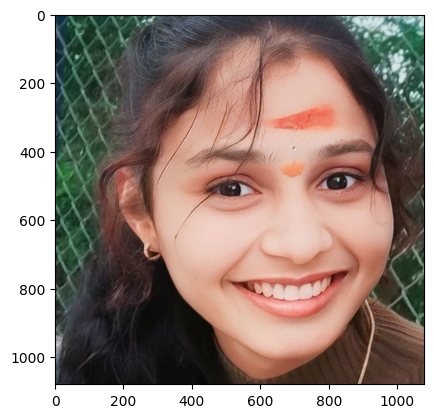

In [4]:
plt.imshow(img)

In [7]:
i1= cv2.imread(r"C:\Users\Sriya v\OneDrive\Desktop\CNN\Training\happy\IMG_20230709_225009_593.jpg")
i1

array([[[ 91,  72,  29],
        [ 90,  71,  28],
        [ 88,  68,  27],
        ...,
        [193, 191, 167],
        [178, 179, 153],
        [168, 169, 143]],

       [[ 93,  74,  31],
        [ 92,  73,  30],
        [ 91,  71,  30],
        ...,
        [180, 179, 153],
        [167, 168, 142],
        [159, 160, 134]],

       [[ 93,  73,  32],
        [ 94,  74,  33],
        [ 94,  73,  35],
        ...,
        [171, 170, 144],
        [161, 162, 136],
        [156, 158, 129]],

       ...,

       [[ 89,  77,  65],
        [ 87,  75,  63],
        [ 85,  73,  63],
        ...,
        [ 52,  63,  93],
        [ 52,  64,  92],
        [ 34,  46,  74]],

       [[ 93,  81,  69],
        [ 89,  77,  65],
        [ 86,  74,  64],
        ...,
        [ 54,  65,  95],
        [ 52,  64,  92],
        [ 34,  46,  74]],

       [[ 96,  84,  72],
        [ 91,  79,  67],
        [ 87,  75,  65],
        ...,
        [ 55,  66,  96],
        [ 51,  63,  91],
        [ 33,  45,  73]]

In [8]:
i1.shape  

(1080, 1080, 3)

In [9]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [13]:
train_dataset = train.flow_from_directory(r"C:\Users\Sriya v\OneDrive\Desktop\CNN\Training",
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')

validation_dataset = validation.flow_from_directory(r"C:\Users\Sriya v\OneDrive\Desktop\CNN\Validation",
                                                    target_size=(200,200),
                                                    batch_size=3,
                                                    class_mode='binary')


Found 4 images belonging to 2 classes.
Found 1 images belonging to 2 classes.


In [14]:
 train_dataset.class_indices

{'happy': 0, 'not hpy': 1}

In [15]:
train_dataset.classes

array([0, 0, 0, 1])

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

In [18]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=10,
                   validation_data=validation_dataset) 

Epoch 1/10
2/3 [===================>..........] - ETA: 0s - loss: 0.5167 - acc: 0.7500WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 30 batches). You may need to use the repeat() function when building your dataset.


3/3 [==============================] - 3s 474ms/step - loss: 0.5167 - acc: 0.7500 - val_loss: 3.4895e-05 - val_acc: 1.0000


Epoch 1/10
3/3 [==============================] - 4s 1s/step - loss: 2.7805 - acc: 0.5556 - val_loss: 0.8273 - val_acc: 0.4231
Epoch 2/10
3/3 [==============================] - 3s 979ms/step - loss: 0.3682 - acc: 0.7778 - val_loss: 0.9256 - val_acc: 0.4615
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 0.6017 - acc: 0.7778 - val_loss: 1.0744 - val_acc: 0.3846
Epoch 4/10
3/3 [==============================] - 3s 959ms/step - loss: 0.1696 - acc: 0.8889 - val_loss: 0.9432 - val_acc: 0.4231
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 0.3171 - acc: 0.7778 - val_loss: 1.1868 - val_acc: 0.4615
Epoch 6/10
3/3 [==============================] - 3s 978ms/step - loss: 0.1584 - acc: 1.0000 - val_loss: 1.1449 - val_acc: 0.3846
Epoch 7/10
3/3 [==============================] - 3s 986ms/step - loss: 0.7063 - acc: 0.7778 - val_loss: 1.5538 - val_acc: 0.3462
Epoch 8/10
3/3 [==============================] - 3s 1s/step - loss: 0.1939 - acc: 0.8889 - val_los

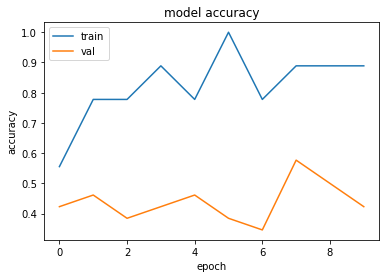

In [ ]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
history=model_fit=model.fit(train_dataset,steps_per_epoch=3,epochs=10,validation_data=validation_dataset) 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

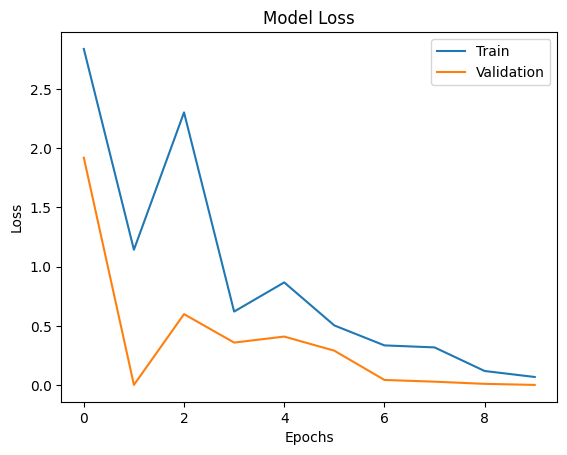

In [22]:
# Now, you can plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()